# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
data = pd.read_csv('../data/merged_data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,wave_height,dominant_period,avg_period,dominant_wave_direction_sin,dominant_wave_direction_cos,wave_height_1.0_h,dominant_period_1.0_h,avg_period_1.0_h,dominant_wave_direction_sin_1.0_h,dominant_wave_direction_cos_1.0_h,...,wave_height_9.0_h,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_sin_9.0_h,dominant_wave_direction_cos_9.0_h,score,wind_speed,gust_speed,wind_direction_sin,wind_direction_cos
0,2.56,11.76,9.82,-0.681998,0.731354,2.52,13.33,9.60,-0.669131,0.743145,...,2.94,13.33,10.56,-0.719340,0.694658,6.440000,0.60,1.05,0.410719,0.911762
1,2.46,13.33,9.98,-0.681998,0.731354,2.40,13.33,9.99,-0.669131,0.743145,...,2.80,14.29,10.01,-0.731354,0.681998,7.266667,0.28,0.82,0.671721,-0.740805
2,2.20,12.50,9.79,-0.681998,0.731354,2.56,11.76,9.82,-0.681998,0.731354,...,2.71,13.33,9.84,-0.681998,0.731354,7.223333,0.20,0.78,0.972776,-0.231748
3,2.33,11.76,9.75,-0.681998,0.731354,2.46,13.33,9.98,-0.681998,0.731354,...,2.67,13.33,9.67,-0.694658,0.719340,15.180000,0.28,0.70,0.829038,0.559193
4,2.48,11.76,10.13,-0.529919,0.848048,2.20,12.50,9.79,-0.681998,0.731354,...,2.65,14.29,9.92,-0.719340,0.694658,4.786667,0.52,0.90,-0.923210,0.384295


## Correlations

In [9]:
data.corr()['score'].sort_values().head(10)

dominant_period_6.0_h   -0.290794
dominant_period_3.0_h   -0.262250
dominant_period_1.5_h   -0.256876
dominant_period         -0.235003
dominant_period_1.0_h   -0.233901
dominant_period_9.0_h   -0.223908
wave_height_3.0_h       -0.130201
wave_height             -0.126441
wave_height_1.0_h       -0.114815
wind_speed              -0.104216
Name: score, dtype: float64

In [10]:
data.corr()['score'].sort_values(ascending=False).head(10)

score                                1.000000
avg_period_9.0_h                     0.199619
dominant_wave_direction_sin          0.161917
avg_period_6.0_h                     0.159199
dominant_wave_direction_sin_6.0_h    0.150756
dominant_wave_direction_sin_9.0_h    0.143119
dominant_wave_direction_sin_1.0_h    0.140229
dominant_wave_direction_sin_1.5_h    0.133282
dominant_wave_direction_sin_3.0_h    0.123102
dominant_wave_direction_cos_9.0_h    0.117964
Name: score, dtype: float64

## Pairplot
Highest correlation features

<Figure size 576x864 with 0 Axes>

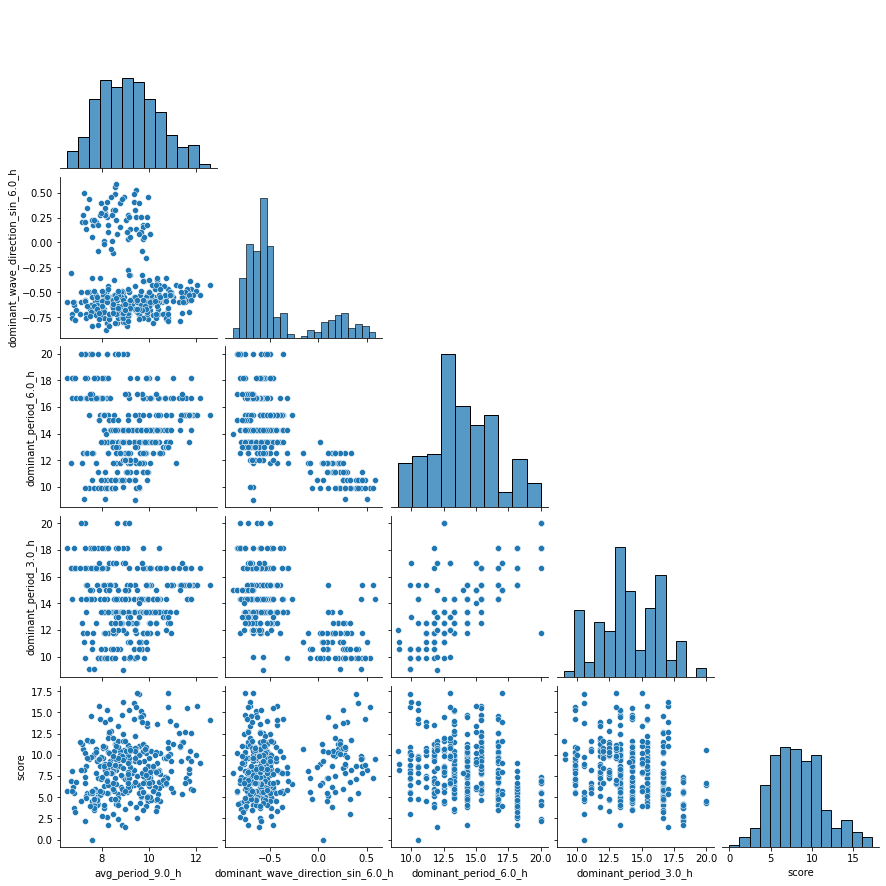

In [5]:
plt.figure(figsize=(8, 12))
sns.pairplot(
    data=data[
        [
            "avg_period_9.0_h",
            "dominant_wave_direction_sin_6.0_h",
            "dominant_period_6.0_h",
            "dominant_period_3.0_h",
            "score",
        ]
    ],
    corner=True,
);


## Water temperature

Water temperature and its offsets appear to be highly correlated to my target, but very evenly distributed. It is also not considered an important factor in surf forecasting and wave quality. Therefore I will go back and eliminate this feature.

## Events with most data

In [40]:
all_events = pd.read_csv("../data/wsl/avg_all_years_eda.csv", index_col=0).rename(columns={'top_two_waves_total': 'score'})
all_events['event'].unique()


array(['Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach',
       'Billabong Pro Teahupoo', 'Globe Pro Fiji', 'Billabong Pro J-Bay',
       'Rip Curl Pro Search Bali', 'Boost Mobile Pro',
       'Quiksilver Pro France', 'Billabong Pro Mundaka',
       'Hang Loose Santa Catarina Pro', 'Billabong Pipeline Masters',
       'Hurley Pro Trestles', 'Rip Curl Search', 'Santa Catarina Pro',
       'Rip Curl Pro Portugal', 'Billabong Pipe Masters',
       'Billabong Rio Pro', 'Quiksilver Pro New York', 'Volcom Fiji Pro',
       "O'Neill Coldwater Classic Santa Cruz", 'Oakley Pro Bali',
       'Drug Aware Margaret River Pro', 'Fiji Pro', 'J-Bay Open',
       'Billabong Pro Tahiti', 'Hurley Pro at Trestles',
       'Moche Rip Curl Pro Portugal', 'Oi Rio Pro',
       'MEO Rip Curl Pro Portugal', 'Outerknown Fiji Pro',
       'Corona Open J-Bay', 'Corona Bali Protected',
       'Uluwatu CT Margaret River Pro', "Tahiti Pro Teahupo'o",
       'Margaret River Pro',
       'Billabong Pipe Masters 

### Combine events held at same locations but with different names

In [41]:
# Make list of pipeline events from previous cell
pipe = [
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pro Pipeline",
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pipe Masters",
    "Billabong Pipeline Masters",
]

all_events.loc[all_events["event"].isin(pipe)].shape


(1649, 6)

In [42]:
# Gold Coast
gold = [
    'Quiksilver Pro Gold Coast', 
]

all_events.loc[all_events["event"].isin(gold)].shape

(1473, 6)

In [43]:
# France
france = [
    'Quiksilver Pro France',
]

all_events.loc[all_events["event"].isin(france)].shape

(1444, 6)

In [44]:
# Trestles
trest = [
    "Hurley Pro Trestles",
    "Hurley Pro at Trestles",
]

all_events.loc[all_events["event"].isin(trest)].shape


(1086, 6)

## Scores by Year - All Events

''

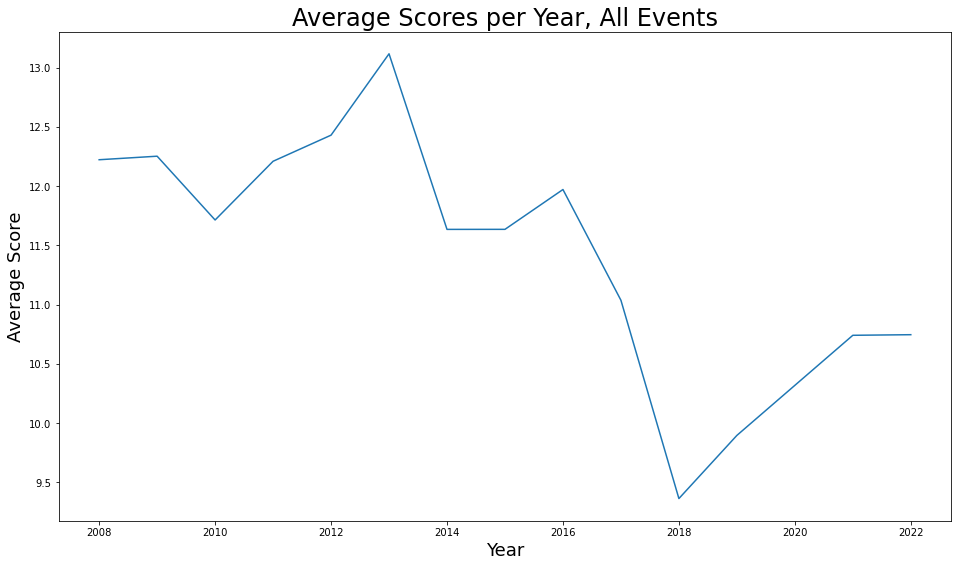

In [143]:
df = all_events.groupby(by='year').mean()
df = df.reset_index()
plt.figure(figsize=(16,9))
sns.lineplot(x=df['year'], y=df['score'])
plt.xlabel("Year", size=18)
plt.ylabel("Average Score", size=18)
plt.title("Average Scores per Year, All Events", size=24)
plt.savefig('../presentation/figures/avg-scores-all-events.png')
;

## Scores by Year - Pipeline

''

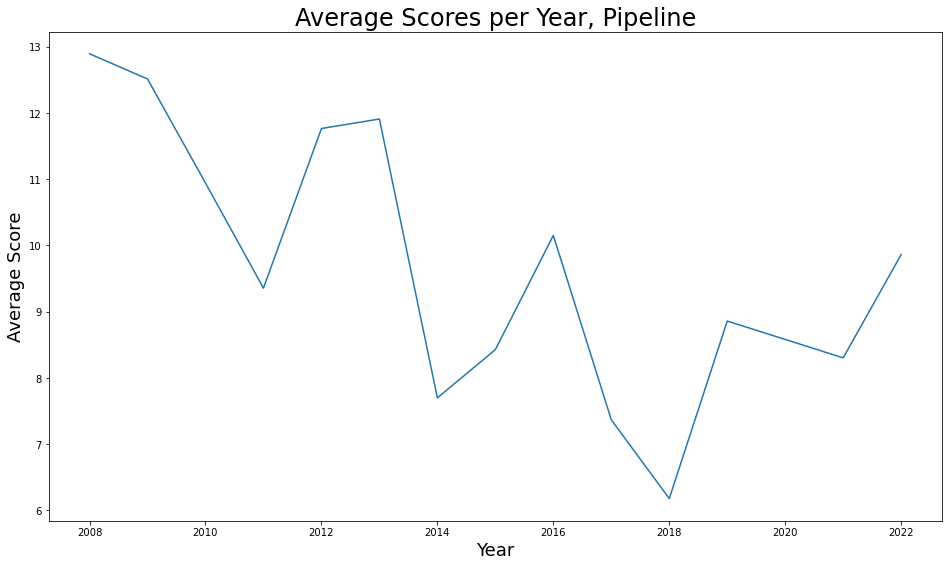

In [144]:
df = all_events.groupby(by=['year', 'event']).mean()
df = df.reset_index()
df = df[df['event'].isin(pipe)]
plt.figure(figsize=(16,9))
sns.lineplot(x=df['year'], y=df['score'])
plt.xlabel("Year", size=18)
plt.ylabel("Average Score", size=18)
plt.title("Average Scores per Year, Pipeline", size=24)
plt.savefig('../presentation/figures/avg-scores-pipeline.png')
;

## Scores by Round - All Events

''

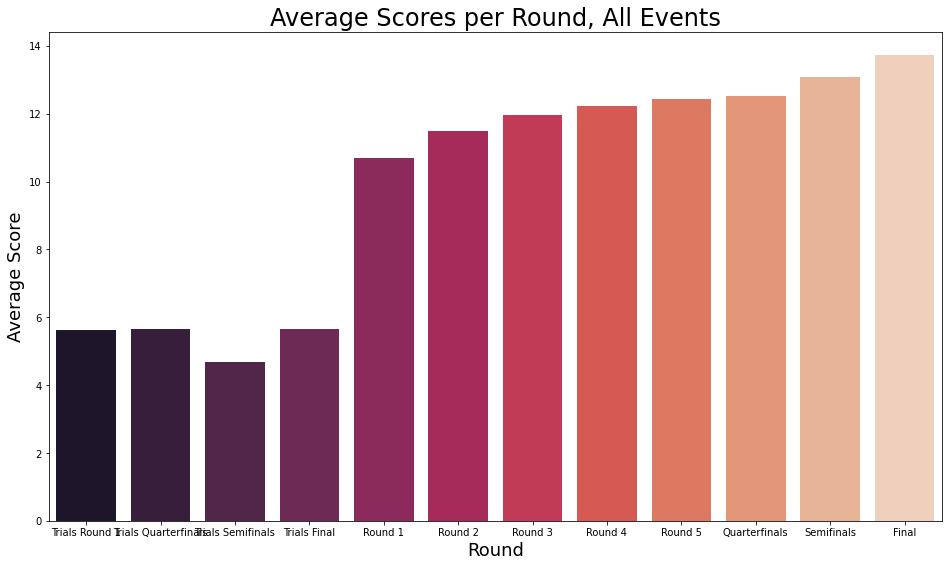

In [156]:
df = all_events.groupby(by='round').mean()
df = df.reset_index()
plt.figure(figsize=(16,9))
sns.barplot(
    x=df['round'],
    y=df['score'],
    order=['Trials Round 1', 'Trials Quarterfinals', 'Trials Semifinals', 'Trials Final', 'Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Quarterfinals', 'Semifinals', 'Final'],
    palette='rocket'
)
plt.xlabel("Round", size=18)
plt.ylabel("Average Score", size=18)
plt.title("Average Scores per Round, All Events", size=24)
plt.savefig('../presentation/figures/avg-scores-per-round.png')
;

## Scores by Round - Pipeline

''

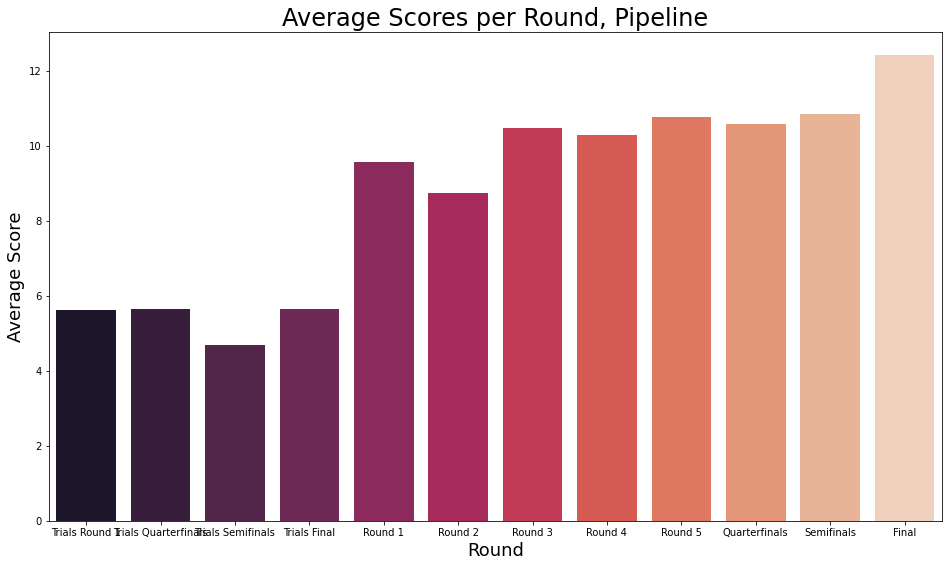

In [157]:
df = all_events.groupby(by=['event', 'round']).mean()
df = df.reset_index()
df = df[df['event'].isin(pipe)]
plt.figure(figsize=(16,9))
sns.barplot(
    x=df['round'],
    y=df['score'],
    order=['Trials Round 1', 'Trials Quarterfinals', 'Trials Semifinals', 'Trials Final', 'Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Quarterfinals', 'Semifinals', 'Final'],
    palette='rocket',
    ci=None
)
plt.xlabel("Round", size=18)
plt.ylabel("Average Score", size=18)
plt.title("Average Scores per Round, Pipeline", size=24)
plt.savefig('../presentation/figures/avg-scores-per-round-pipe.png')
;

## Scores by Athlete - All Events

''

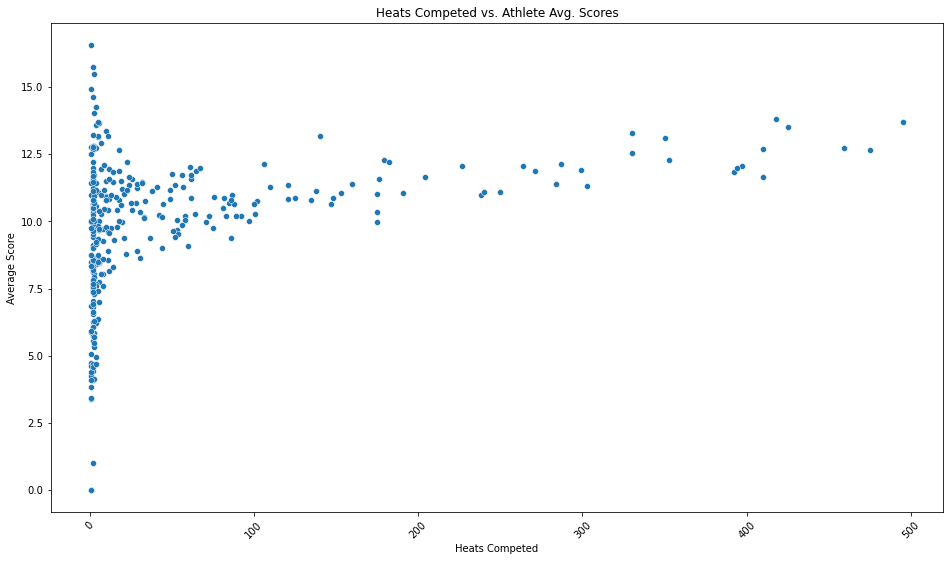

In [76]:
df = all_events.groupby(by='name').mean()
df = df.reset_index()
df2 = all_events.groupby(by='name').count()
df2 = df2.reset_index()
plt.figure(figsize=(16,9))
sns.scatterplot(
    x=df2['score'],
    y=df['score'],
    palette='rocket',
    legend=False
)
plt.xticks(rotation=45)
plt.xlabel("Heats Competed")
plt.ylabel("Average Score")
plt.title("Heats Competed vs. Athlete Avg. Scores")
;

In [80]:
df2.sort_values(by='score', ascending=False).head()

,name,year,event,round,heat,score
174,Kelly Slater,495,495,495,495,495
154,Jordy Smith,475,475,475,475,475
5,Adriano de Souza,459,459,459,459,459
150,Joel Parkinson,425,425,425,425,425
221,Mick Fanning,418,418,418,418,418


## Scores by Athlete - Pipeline

''

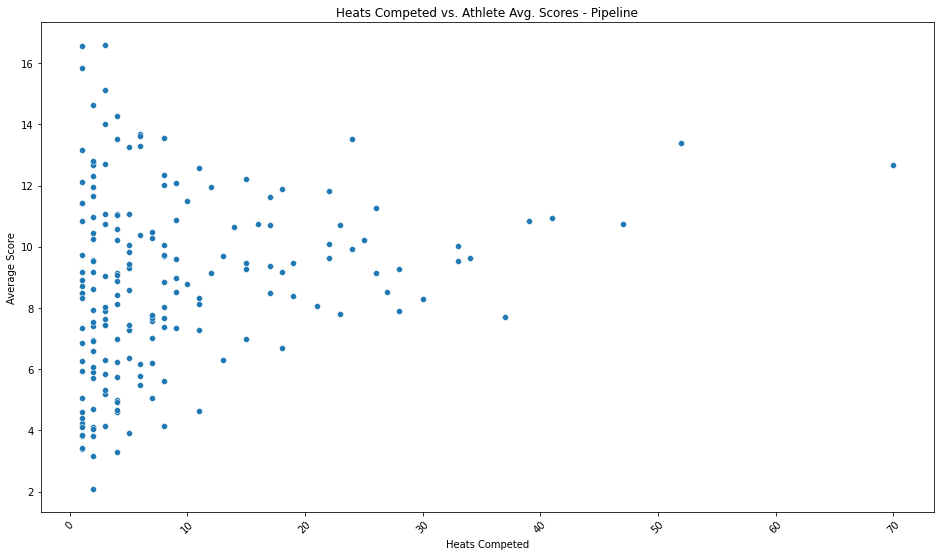

In [85]:
df = all_events[all_events['event'].isin(pipe)]
df = df.groupby(by=['name']).mean()
df = df.reset_index()
df2 = all_events[all_events['event'].isin(pipe)]
df2 = df2.groupby(by=['name']).count()
df2 = df2.reset_index()
plt.figure(figsize=(16,9))
sns.scatterplot(
    x=df2['score'],
    y=df['score'],
    palette='rocket',
    legend=False
)
plt.xticks(rotation=45)
plt.xlabel("Heats Competed")
plt.ylabel("Average Score")
plt.title("Heats Competed vs. Athlete Avg. Scores - Pipeline")
;

In [86]:
df2.sort_values(by='score', ascending=False).head()

,name,year,event,round,heat,score
100,Kelly Slater,70,70,70,70,70
82,John John Florence,52,52,52,52,52
51,Gabriel Medina,47,47,47,47,47
81,Joel Parkinson,41,41,41,41,41
74,Jeremy Flores,39,39,39,39,39


## Wave Seasonality

In [93]:
buoy = pd.read_csv("../data/noaa/pipeline_buoy_full_shifted.csv", parse_dates=True)
buoy = buoy[
    [
        "date",
        "wave_height",
        "dominant_period",
        "avg_period",
        "dominant_wave_direction_sin",
        "dominant_wave_direction_cos",
    ]
]
buoy['date'] = pd.to_datetime(buoy['date'])


''

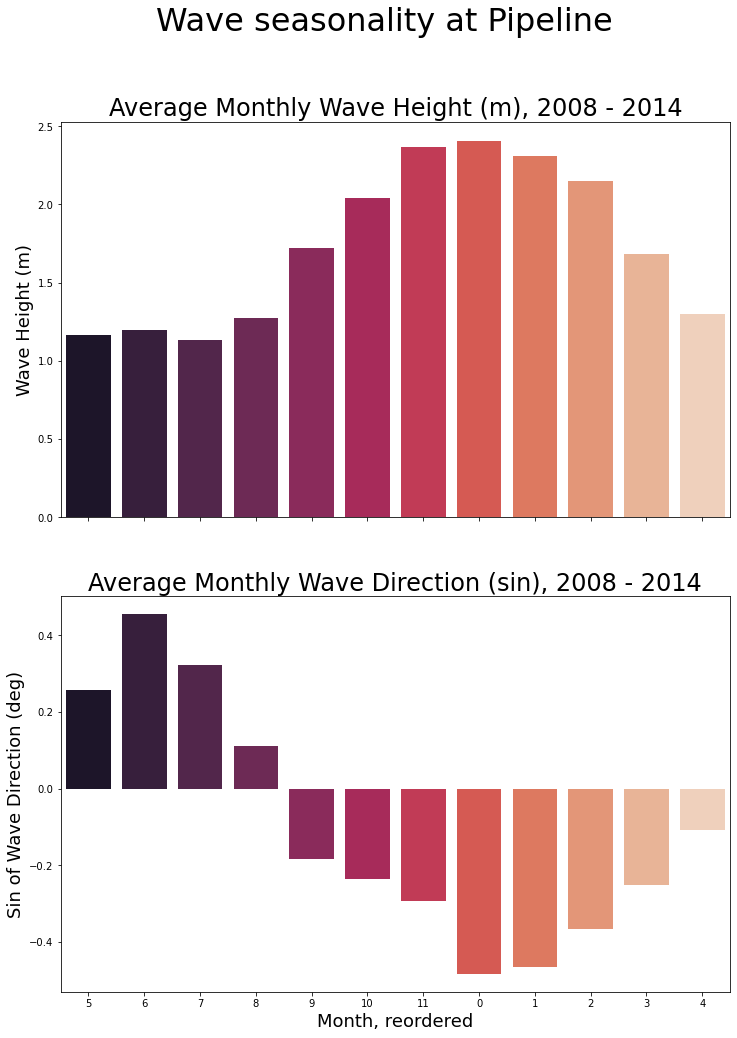

In [140]:
df = buoy.groupby(by=buoy['date'].dt.month).mean()
df = df.reset_index()
fig, axes = plt.subplots(2, 1,figsize=(12, 16), sharex=True)
fig.suptitle('Wave seasonality at Pipeline', size=32)
sns.barplot(ax=axes[0], x=df.index, y=df['wave_height'], palette='rocket', order=[5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4])
sns.barplot(ax=axes[1], x=df.index, y=df["dominant_wave_direction_sin"], palette='rocket', order=[5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4])
axes[0].set_title("Average Monthly Wave Height (m), 2008 - 2014", size=24)
axes[1].set_title("Average Monthly Wave Direction (sin), 2008 - 2014", size=24)
axes[1].set_xlabel("Month, reordered", size=18)
axes[0].set_ylabel("Wave Height (m)", size=18)
axes[1].set_ylabel("Sin of Wave Direction (deg)", size=18)
plt.savefig('../presentation/figures/wave-seasons.png')
;